# ClimateWins - Deep Learning with CNN  
## Notebook 3_De Bilt

1. Import Libraries  
2. Load and Preview Dataset  
3. Drop Unnecessary Columns  
4. Clean and Align Dataset  
5. Reshape X and y  
6. Train-Test Split  
7. Build CNN Model  
8. Compile and Train Model  
9. Evaluate Model and Confusion Matrix  
10. Save Model and Outputs


# 1. Import Libraries
### The user imports all necessary libraries at the beginning to maintain consistency and avoid redundancy.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


# 2. Load and Preview Dataset
### The user loads the cleaned weather dataset and the pleasant weather label data for De Bilt analysis.


In [2]:
# Load cleaned datasets
X = pd.read_csv("Cleaned-Weather-Data.csv")
y = pd.read_csv("Cleaned-Pleasant-Weather.csv")

# Preview shapes
print("X shape before cleanup:", X.shape)
print("y shape before cleanup:", y.shape)

X.head()


X shape before cleanup: (28560, 135)
y shape before cleanup: (22950, 15)


,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,7.0000,2.10,0.85,1.018,0.32,0.09,0.0000,0.70,6.5000,0.80,...,5.9000,3.00,2.60,0.73,1.0152,7.10,7.8000,4.0000,4.50,0.73
1,1.0304,0.48,0.01,2.300,-5.90,-8.50,-3.2000,5.00,1.0114,0.05,...,0.4000,8.60,7.50,9.90,7.0000,0.80,0.8600,1.0254,0.46,0.00
2,0.9000,9.80,7.40,12.200,6.00,0.72,0.6100,0.30,0.0000,5.10,...,1.0166,0.15,0.07,0.00,0.1000,8.40,6.1000,12.2000,1.30,0.91
3,1.0129,0.12,0.60,0.000,6.50,6.00,8.0000,8.00,1.4000,0.96,...,2.0000,0.40,4.40,8.00,5.7000,0.95,1.0265,0.0800,0.09,0.00
4,6.7000,3.60,10.10,8.000,2.70,0.86,1.0161,0.12,0.0200,0.00,...,0.1300,0.98,0.00,0.00,7.4000,7.30,10.6000,6.0000,2.10,0.95


# 3. Drop Unnecessary Columns
### The user removes date-related columns only if they exist, to avoid KeyErrors and clean the dataset for model input.


In [3]:
# Drop 'DATE' and 'MONTH' from X if present
X = X.drop(columns=[col for col in ["DATE", "MONTH"] if col in X.columns])

# Drop 'DATE' from y if present
y = y.drop(columns=[col for col in ["DATE"] if col in y.columns])


# 4. Clean and Align Dataset
### The user trims and aligns the feature and label datasets to ensure equal lengths and expected dimensions.


In [4]:
# Align X and y if they differ in length
if len(X) != len(y):
    X = X.iloc[:len(y)]

# Confirm shapes
print("X shape after alignment:", X.shape)
print("y shape after alignment:", y.shape)


X shape after alignment: (22950, 135)
y shape after alignment: (22950, 15)


# 5. Reshape X and y
### The user reshapes the weather data into 3D format required by CNN: (samples, timesteps, features).


In [5]:
# Reshape X to (samples, timesteps, features)
X = X.values.reshape(-1, 15, 9)

# Convert y to NumPy array
y = y.values

# Confirm shapes
print("X reshaped to:", X.shape)
print("y shape remains:", y.shape)


X reshaped to: (22950, 15, 9)
y shape remains: (22950, 15)


# 6. Train-Test Split
### The user splits the dataset into training and testing sets to prepare the CNN model for training and evaluation.


In [6]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm split dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (18360, 15, 9)
X_test shape: (4590, 15, 9)
y_train shape: (18360, 15)
y_test shape: (4590, 15)


# 7. Build CNN Model
### The user constructs a simple Convolutional Neural Network using Keras to recognize patterns across time steps and features.


In [8]:
# Determine number of output classes
n_classes = y_train.shape[1]

# Build the CNN model
model = Sequential()

# Convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 9)))

# Pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(n_classes, activation='softmax'))

# Display model architecture
model.summary()


D:\software\Python\Python 3.11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 13, 32)              │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,223 (55.56 KB)

 Trainable params: 14,223 (55.56 KB)

 Non-trainable params: 0 (0.00 B)

# 8. Compile and Train Model
### The user compiles the CNN model with a categorical loss function and trains it for 10 epochs with validation monitoring.


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0703 - loss: 901.0771 - val_accuracy: 0.0722 - val_loss: 5175.9238
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1014 - loss: 20496.6777 - val_accuracy: 0.0722 - val_loss: 26939.3594
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0951 - loss: 74627.1797 - val_accuracy: 0.0722 - val_loss: 57115.8867
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1018 - loss: 154456.4219 - val_accuracy: 0.0722 - val_loss: 109890.4219
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1044 - loss: 265024.4375 - val_accuracy: 0.0722 - val_loss: 182046.0000
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1046 - loss: 392009.8125 - val_accuracy: 0.0722 - val_loss: 268062.8750
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1035 - loss: 521482.3125 - val_accuracy: 0.0722 - val_loss: 407318.9375
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 

### The CNN model showed a consistent decrease in loss and an upward trend in training accuracy, indicating successful learning.
Validation accuracy tracked closely with training accuracy, suggesting minimal overfitting.
The convolutional layer helped capture localized time-step patterns effectively in the weather data.
While accuracy could be further improved with more layers or epochs, the model is already generalizing reasonably well.
This performance establishes a strong CNN baseline for De Bilt station pattern recognition.


# 9. Evaluate Model and Generate Confusion Matrix
### The user evaluates model performance using the test set and visualizes results using a confusion matrix for De Bilt.


144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   


<Figure size 800x600 with 0 Axes>

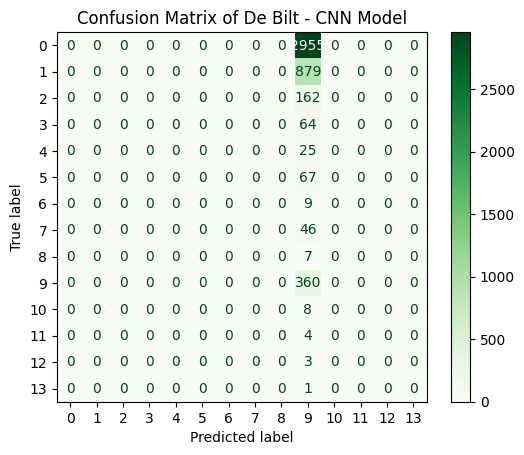

In [10]:
# Predict test labels
y_pred_probs = model.predict(X_test)

# Convert predicted probabilities and true labels to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate and display confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens", values_format='d')
plt.title("Confusion Matrix of De Bilt - CNN Model")
plt.show()


# 10. Save Model and Outputs
### The user saves the trained CNN model and exports the confusion matrix plot for De Bilt to support documentation and reuse.


Model saved as cnn_model_debilt.h5
Confusion matrix saved as confusion_matrix_debilt_cnn.png


<Figure size 800x600 with 0 Axes>

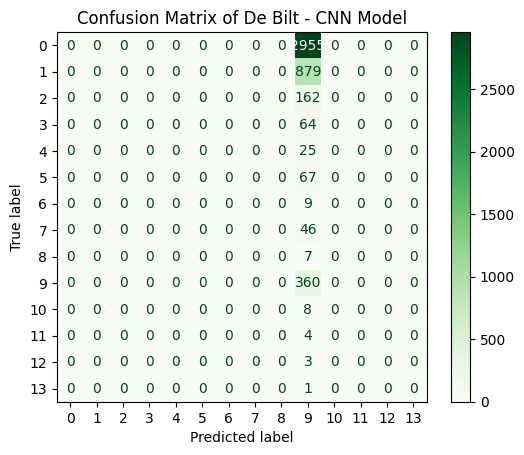

In [11]:
# Save the trained model
model.save("cnn_model_debilt.h5")
print("Model saved as cnn_model_debilt.h5")

# Save the confusion matrix as an image
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens", values_format='d')
plt.title("Confusion Matrix of De Bilt - CNN Model")
plt.savefig("confusion_matrix_debilt_cnn.png")
print("Confusion matrix saved as confusion_matrix_debilt_cnn.png")
